# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [35]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_of_experts/rater_agreement.csv'

In [36]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_of_experts'

In [37]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,frontal,temporal,parietal,occipital,cerebellum,Mesial_Temporal,ventricle,cerebellar_vermis,cerebellar_fissures,frontal_eh,temporal_eh,parietal_eh,occipital_eh,cerebellum_eh,mesial_temporal_eh,ventricle_eh
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2,1,1,2,1,1,1,1,1,1,1,0,1,1,1,1,1
2,3,2,2,2,0,1,3,2,0,0,1,2,1,0,0,2,2
3,4,0,1,1,0,0,4,2,0,2,0,1,0,0,0,2,1
4,5,1,0,1,0,0,1,0,0,2,0,1,1,0,0,2,0
5,6,1,0,1,0,0,1,0,0,1,0,2,2,0,0,1,0
6,7,1,1,2,1,1,2,2,1,1,1,2,2,1,1,1,1
7,8,2,2,1,0,0,4,2,0,1,2,1,0,0,0,4,2
8,9,2,1,2,0,1,3,2,1,2,1,1,2,0,1,3,2
9,10,1,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'frontal', 'temporal', 'parietal', 'occipital', 'cerebellum',
       'Mesial_Temporal', 'ventricle', 'cerebellar_vermis',
       'cerebellar_fissures', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_eh', 'cerebellum_eh', 'mesial_temporal_eh', 'ventricle_eh'],
      dtype='object')

In [5]:
drop_list = ['current_age']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

KeyError: ['current_age']

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

# 02 - Cohen's Kappa

In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

def calculate_cohens_kappa_by_category(df: pd.DataFrame, column_mapping: dict) -> dict:
    """
    Calculate Cohen's Kappa score for specified pairs of columns in two pandas DataFrames.
    This function is useful for evaluating agreement on a category-by-category basis.

    Args:
        df (pd.DataFrame): The first DataFrame with ratings by the first rater.
        column_mapping (dict): A dictionary mapping columns in df to corresponding columns in df.

    Returns:
        dict: A dictionary with column names from df1 as keys and their corresponding Cohen's Kappa
              scores as values.

    Raises:
        ValueError: If any specified column does not exist in its respective DataFrame.
    """

    kappa_scores = {}
    for k, v in column_mapping.items():
        # Check if columns exist in their respective DataFrames
        if k not in df.columns or v not in df.columns:
            raise ValueError(f"Column '{k}' or '{v}' does not exist in the DataFrame.")

        # Calculate Cohen's Kappa for the column pair and add to the result dictionary
        kappa_scores[k] = cohen_kappa_score(df[k], df[v])

    return kappa_scores

In [ ]:
data_df.columns

Dictionary Mapping Columns to be Kappa'd

In [ ]:
dict = {'frontal': 'frontal_eh', 
        'temporal':  'temporal_eh', 
        'parietal': 'parietal_eh',
        'occipital': 'occipital_eh',
        'cerebellum': 'cerebellum_eh',
       'mesial_temporal': 'mesial_temporal_eh',
       'ventricle': 'ventricle_eh'
}

In [ ]:
calculate_cohens_kappa_by_category(data_df, dict)

# Intraclass Correlation Coefficient

ICC1 (Single raters absolute):
- Use-Case: Assess the agreement or reliability of ratings provided by a single rater on the same items over multiple trials or observations.
Example: Evaluating how consistent a single medical doctor's diagnoses are for the same set of patients over time.

ICC2 (Single random raters):
- Use-Case: Assess the agreement among multiple raters when raters are randomly selected or if you want to account for random variation among raters.
Example: Evaluating the agreement among different teachers when grading the same set of student assignments, with teachers selected randomly.

ICC3 (Single fixed raters):
- Use-Case: Assess the agreement among multiple raters when raters are fixed or predetermined. Assumes that the same raters provide ratings across all observations.
Example: Evaluating the agreement among expert judges who consistently rate the same set of artworks.

ICC1k (Average raters absolute):
- Use-Case: Assess the agreement or reliability of the average ratings across multiple raters for the same items over multiple trials or observations.
Example: Evaluating how consistent the average ratings of a panel of judges are when rating the same set of food dishes for a cooking competition.

ICC2k (Average random raters):
- Use-Case: Assess the agreement among average ratings provided by multiple raters when raters are randomly selected. Accounts for random variation among raters.
Example: Evaluating the agreement among the average scores given by randomly selected sports referees for the same game.

ICC3k (Average fixed raters):
- Use-Case: Assess the agreement among average ratings provided by multiple raters when raters are fixed or predetermined. Assumes the same raters provide average ratings consistently.
Example: Evaluating the agreement among the average scores given by a fixed panel of judges for multiple rounds of a talent competition.

In [11]:
import pandas as pd
import numpy as np
import pingouin as pg

def calculate_icc(df: pd.DataFrame, column_mapping: dict) -> dict:
    
    icc_scores = {}
    for k, v in column_mapping.items():
    # Combine the series into a DataFrame
        series1 = df[k]
        series2 = df[v]
    
        icc_df = series1.to_frame(name='rating1')
        icc_df['rating2'] = series2

        # Melt the DataFrame to long format
        df_melted = icc_df.melt(value_vars=['rating1', 'rating2'], var_name='rater', value_name='rating')
        # Add a subject column
        df_melted['subject'] = df_melted.groupby('rater').cumcount()
        # Calculate ICC
        icc_result = pg.intraclass_corr(data=df_melted, targets='subject', raters='rater', ratings='rating')
        icc_scores[k] = icc_result
    return icc_scores

In [12]:
data_df.columns

Index(['subject', 'frontal', 'temporal', 'parietal', 'occipital', 'cerebellum',
       'Mesial_Temporal', 'ventricle', 'cerebellar_vermis',
       'cerebellar_fissures', 'frontal_eh', 'temporal_eh', 'parietal_eh',
       'occipital_eh', 'cerebellum_eh', 'mesial_temporal_eh', 'ventricle_eh'],
      dtype='object')

Dict Mapping Columns to Be ICC'd

In [15]:
dict = {'frontal': 'frontal_eh', 
        'temporal':  'temporal_eh', 
        'parietal': 'parietal_eh',
        'occipital': 'occipital_eh',
        'cerebellum': 'cerebellum_eh',
       'Mesial_Temporal': 'mesial_temporal_eh',
       'ventricle': 'ventricle_eh'
}

In [16]:
icc = calculate_icc(data_df, dict)
icc

{'frontal':     Type              Description       ICC         F  df1  df2          pval  \
 0   ICC1   Single raters absolute  0.568981  3.640172   49   50  5.709610e-06   
 1   ICC2     Single random raters  0.588599  4.674483   49   49  1.405308e-07   
 2   ICC3      Single fixed raters  0.647545  4.674483   49   49  1.405308e-07   
 3  ICC1k  Average raters absolute  0.725288  3.640172   49   50  5.709610e-06   
 4  ICC2k    Average random raters  0.741029  4.674483   49   49  1.405308e-07   
 5  ICC3k     Average fixed raters  0.786073  4.674483   49   49  1.405308e-07   
 
           CI95%  
 0  [0.35, 0.73]  
 1   [0.3, 0.76]  
 2  [0.45, 0.78]  
 3  [0.52, 0.84]  
 4  [0.46, 0.87]  
 5  [0.62, 0.88]  ,
 'temporal':     Type              Description       ICC         F  df1  df2          pval  \
 0   ICC1   Single raters absolute  0.669389  5.049409   49   50  3.121702e-08   
 1   ICC2     Single random raters  0.671141  5.217536   49   49  2.258080e-08   
 2   ICC3      Single

Plot a Bunch of ICCs

In [38]:
import os
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from pingouin import intraclass_corr
import matplotlib.patches as mpatches
from calvin_utils.statistical_utils.distribution_statistics import BootstrappedDistributionStatistics
from calvin_utils.statistical_utils.resampling_functions import Bootstrap

class ICCForest():
    def __init__(self, dataframe, comparisons_dict, ICC_Method='ICC1', out_dir=None, full_legend_patches=False, palette="tab10"):
        self.ICC_Method = ICC_Method
        self.comparisons_dict = comparisons_dict
        self.df = dataframe
        self.out_dir = out_dir
        self.full_legend_patches=full_legend_patches
        self.palette = palette

    def calculate_icc(self, col1, col2):
        # Select only the specified columns and rename them for compatibility with pingouin
        data = self.df[[col1, col2]].rename(columns={col1: 'rating1', col2: 'rating2'})

        # Reshape data for pingouin's intraclass_corr function
        df_melted = data.melt(value_vars=['rating1', 'rating2'], var_name='rater', value_name='rating')
        df_melted['subject'] = df_melted.groupby('rater').cumcount()

        # Calculate ICC
        icc_result = intraclass_corr(data=df_melted, targets='subject', raters='rater', ratings='rating')
        
        # Return ICC, 95CI[lower, upper], p-value
        return icc_result.set_index('Type').loc[self.ICC_Method, 'ICC'], icc_result.set_index('Type').loc[self.ICC_Method, 'CI95%'], icc_result.set_index('Type').loc[self.ICC_Method, 'pval']
    
    def save_icc_forest(self, icc_forest):
        os.makedirs(os.path.join(self.out_dir, 'icc_figures'), exist_ok=True)
        icc_forest.savefig(os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot.png'))
        icc_forest.savefig(os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot_barplot.svg'))
        print('Figure saved to: ', (os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot')))
    
    def plot_icc_forest(self):
        figure = plt.figure(figsize=(len(self.comparisons_dict)*1.3, len(self.comparisons_dict)*1))
        
        # Create a color palette with enough unique colors
        colors = sns.color_palette(self.palette, len(self.comparisons_dict))
        
        # Create legend patches
        legend_patches = []
        
        # Iterate through the dictionary and plot ICC for each comparison
        for idx, (col1_name, col2_name) in enumerate(self.comparisons_dict.items()):
            # Calculate ICC
            print(col1_name,
            col2_name)
            icc_value, CI95, pval = self.calculate_icc(col1_name, col2_name)
            print(pval)

            # Bootstrap 95% confidence interval
            ci_lower, ci_upper = CI95[0], CI95[1]
            # Plot ICC with confidence interval
            plt.errorbar(x=icc_value, y=idx, xerr=[[icc_value - ci_lower], [ci_upper - icc_value]], fmt='o', color=colors[idx], capsize=5)
            
            # Add legend patch
            if self.full_legend_patches:
                legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{col1_name} vs {col2_name}'))
            else:
                legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{col1_name.capitalize().replace("_"," ")}, p = {pval:.2e}'))

        plt.xlim(0, 1)
        plt.ylim(-1, len(self.comparisons_dict))
        plt.yticks([])
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.xlabel('ICC')
        plt.title('Intraclass Correlation Coefficients (ICC) with 95% Confidence Intervals')
        plt.grid(axis='x', linestyle='--')
        
        # Add legend
        plt.legend(handles=legend_patches, frameon=False, loc=(0.05, 0.1))
        
        # Save it
        self.save_icc_forest(figure)
        return figure            

In [39]:
dict = {'frontal': 'frontal_eh', 
        'temporal':  'temporal_eh', 
        'parietal': 'parietal_eh',
        'occipital': 'occipital_eh',
        'cerebellum': 'cerebellum_eh',
       'Mesial_Temporal': 'mesial_temporal_eh',
       'ventricle': 'ventricle_eh'
}

frontal frontal_eh
1.4053081997920514e-07
temporal temporal_eh
1.1145964737814905e-08
parietal parietal_eh
1.358534615930031e-07
occipital occipital_eh
2.2435052672353845e-06
cerebellum cerebellum_eh
0.0001903640238352579
Mesial_Temporal mesial_temporal_eh
2.232369135878388e-18
ventricle ventricle_eh
3.971032146924209e-19
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_of_experts/icc_figures/icc_multipl_comparison_barplot


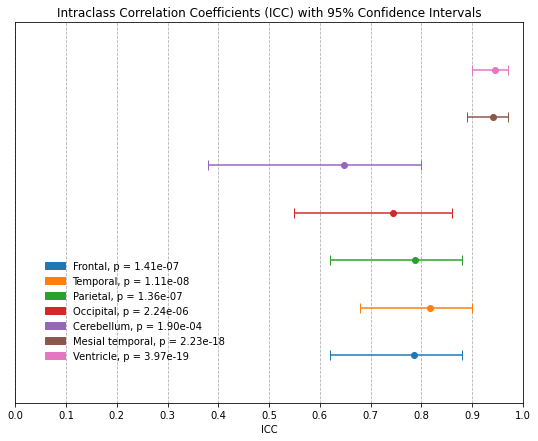

In [40]:
iccplt = ICCForest(dataframe=data_df, comparisons_dict=dict, ICC_Method='ICC3k', out_dir=out_dir, full_legend_patches=False).plot_icc_forest()